#**Pandas**
[ 코드출처 및 참고자료: 파이썬 라이브러리를 활용한 데이터 분석(Python for Data Analysis) - 웨스 맥키니 저 / 김영근 역, 한빛미디어 / O'REILLY ]

In [ ]:
from pandas import Series, DataFrame
import pandas as pd
import numpy as np

##Series
####Series 객체의 문자열 표현: 왼쪽에 색인, 오른쪽에 해당 색인의 값
####Series의 배열과 색인 객체는 각각 values와 index 속성으로 얻을 수 있음

In [ ]:
obj = Series([4, 7, -5, 3])
obj

0    4
1    7
2   -5
3    3
dtype: int64

In [ ]:
obj.values

array([ 4,  7, -5,  3])

In [ ]:
obj.index

RangeIndex(start=0, stop=4, step=1)

####각각의 데이터를 지칭하는 색인을 지정해서 Series 객체를 생성할 때

In [ ]:
obj2 = pd.Series([4, 7, -5, 3], index=['d', 'b', 'a', 'c'])
obj2

d    4
b    7
a   -5
c    3
dtype: int64

In [ ]:
obj2.index

Index(['d', 'b', 'a', 'c'], dtype='object')

In [ ]:
print(obj2['a'])
print('----------------------------')

obj2['d'] = 6
print(obj2[['c', 'a', 'd']])

-5
----------------------------
c    3
a   -5
d    6
dtype: int64


####불리언 배열을 사용해서 값을 걸러내거나 산술 곱셈을 수행하거나 또는 수학 함수를 적용하는 등 NumPy 배열 연산을 수행해도 색인-값은 유지됨

In [ ]:
obj2[obj2 > 0]

d    6
b    7
c    3
dtype: int64

In [ ]:
obj2 * 2

d    12
b    14
a   -10
c     6
dtype: int64

In [ ]:
np.exp(obj2)

d     403.428793
b    1096.633158
a       0.006738
c      20.085537
dtype: float64

####Series는 고정길이의 정렬된 딕셔너리라고 생각하면 이해하기 쉬움

In [ ]:
'b' in obj2

True

In [ ]:
'e' in obj2

False

####딕셔너리 객체로부터 Series 객체 생성하기
####딕셔너리 객체만으로 Series 객체를 생성하면 Series 객체의 색인은 딕셔너리의 키 값이 순서대로 들어감

In [ ]:
sdata = {'Ohio': 35000, 'Texas': 71000, 'Oregon': 16000, 'Utah': 5000}

obj3 = pd.Series(sdata)
obj3

Ohio      35000
Texas     71000
Oregon    16000
Utah       5000
dtype: int64

In [ ]:
states = ['California', 'Ohio', 'Oregon', 'Texas']
obj4 = pd.Series(sdata, index=states)
obj4

California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
dtype: float64

####누락된 데이터 찾기

In [ ]:
pd.isnull(obj4)

California     True
Ohio          False
Oregon        False
Texas         False
dtype: bool

In [ ]:
pd.notnull(obj4)

California    False
Ohio           True
Oregon         True
Texas          True
dtype: bool

In [ ]:
obj4.isnull()

California     True
Ohio          False
Oregon        False
Texas         False
dtype: bool

####서로 다르게 색인된 데이터에 대하여 산술 연산 수행하기

In [ ]:
print(obj3)
print('----------------------------')
print(obj4)
print('----------------------------')
print(obj3 + obj4)

Ohio      35000
Texas     71000
Oregon    16000
Utah       5000
dtype: int64
----------------------------
California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
dtype: float64
----------------------------
California         NaN
Ohio           70000.0
Oregon         32000.0
Texas         142000.0
Utah               NaN
dtype: float64


####Name 속성 사용하기

In [ ]:
obj4.name = 'population'
obj4.index.name = 'state'
obj4

state
California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
Name: population, dtype: float64

In [ ]:
print(obj)
print('----------------------------')
obj.index = ['Bob', 'Steve', 'Jeff', 'Ryan']
print(obj)

0    4
1    7
2   -5
3    3
dtype: int64
----------------------------
Bob      4
Steve    7
Jeff    -5
Ryan     3
dtype: int64


##DataFrame
####DataFrame 생성하기
* 같은 길이의 리스트에 담긴 딕셔너리 이용
* NumPy 배열 이용

In [ ]:
data = {'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada', 'Nevada'],
        'year': [2000, 2001, 2002, 2001, 2002, 2003],
        'pop': [1.5, 1.7, 3.6, 2.4, 2.9, 3.2]}
frame = pd.DataFrame(data)

In [ ]:
frame

state  year  pop
0    Ohio  2000  1.5
1    Ohio  2001  1.7
2    Ohio  2002  3.6
3  Nevada  2001  2.4
4  Nevada  2002  2.9
5  Nevada  2003  3.2

In [ ]:
pd.DataFrame(data, columns=['year', 'state', 'pop'])

year   state  pop
0  2000    Ohio  1.5
1  2001    Ohio  1.7
2  2002    Ohio  3.6
3  2001  Nevada  2.4
4  2002  Nevada  2.9
5  2003  Nevada  3.2

In [ ]:
frame2 = pd.DataFrame(data, columns=['year', 'state', 'pop', 'debt'],
                      index=['one', 'two', 'three', 'four',
                             'five', 'six'])
frame2

year   state  pop debt
one    2000    Ohio  1.5  NaN
two    2001    Ohio  1.7  NaN
three  2002    Ohio  3.6  NaN
four   2001  Nevada  2.4  NaN
five   2002  Nevada  2.9  NaN
six    2003  Nevada  3.2  NaN

In [ ]:
frame2.columns

Index(['year', 'state', 'pop', 'debt'], dtype='object')

In [ ]:
frame2['state']

one        Ohio
two        Ohio
three      Ohio
four     Nevada
five     Nevada
six      Nevada
Name: state, dtype: object

In [ ]:
frame2.year

one      2000
two      2001
three    2002
four     2001
five     2002
six      2003
Name: year, dtype: int64

In [ ]:
frame2.loc['three']

year     2002
state    Ohio
pop       3.6
debt      NaN
Name: three, dtype: object

####Column에는 값을 대입할 수 있음

In [ ]:
frame2['debt'] = 16.5
frame2

year   state  pop  debt
one    2000    Ohio  1.5  16.5
two    2001    Ohio  1.7  16.5
three  2002    Ohio  3.6  16.5
four   2001  Nevada  2.4  16.5
five   2002  Nevada  2.9  16.5
six    2003  Nevada  3.2  16.5

In [ ]:
frame2['debt'] = np.arange(6.)
frame2

year   state  pop  debt
one    2000    Ohio  1.5   0.0
two    2001    Ohio  1.7   1.0
three  2002    Ohio  3.6   2.0
four   2001  Nevada  2.4   3.0
five   2002  Nevada  2.9   4.0
six    2003  Nevada  3.2   5.0

####리스트나 배열을 Column에 대입할 때
* 대입하려는 값의 길이가 DataFrame의 크기와 같아야 함
* Series를 대입할 경우, DataFrame의 색인에 따라 값이 대입됨.
* 없는 색인에는 값이 대입되지 않음

In [ ]:
val = pd.Series([-1.2, -1.5, -1.7], index=['two', 'four', 'five'])
print(val)
print('-------------------------')
frame2['debt'] = val
frame2

two    -1.2
four   -1.5
five   -1.7
dtype: float64
-------------------------


year   state  pop  debt
one    2000    Ohio  1.5   NaN
two    2001    Ohio  1.7  -1.2
three  2002    Ohio  3.6   NaN
four   2001  Nevada  2.4  -1.5
five   2002  Nevada  2.9  -1.7
six    2003  Nevada  3.2   NaN

####없는 Column을 대입하면 새로운 Column이 생성됨

In [ ]:
frame2['eastern'] = frame2.state == 'Ohio'
frame2

year   state  pop  debt  eastern
one    2000    Ohio  1.5   NaN     True
two    2001    Ohio  1.7  -1.2     True
three  2002    Ohio  3.6   NaN     True
four   2001  Nevada  2.4  -1.5    False
five   2002  Nevada  2.9  -1.7    False
six    2003  Nevada  3.2   NaN    False

In [ ]:
del frame2['eastern']
frame2.columns

Index(['year', 'state', 'pop', 'debt'], dtype='object')

In [ ]:
frame2

year   state  pop  debt
one    2000    Ohio  1.5   NaN
two    2001    Ohio  1.7  -1.2
three  2002    Ohio  3.6   NaN
four   2001  Nevada  2.4  -1.5
five   2002  Nevada  2.9  -1.7
six    2003  Nevada  3.2   NaN

####중첩된 딕셔너리를 이용해서 데이터를 생성할 때, 바깥쪽의 딕셔너리의 키 값이 Column이 되고 안에 있는 키는 Row가 됨

In [ ]:
pop = {'Nevada': {2001: 2.4, 2002: 2.9},
       'Ohio': {2000: 1.5, 2001: 1.7, 2002: 3.6}}

In [ ]:
frame3 = pd.DataFrame(pop)
frame3

Nevada  Ohio
2001     2.4   1.7
2002     2.9   3.6
2000     NaN   1.5

In [ ]:
frame3.T

2001  2002  2000
Nevada   2.4   2.9   NaN
Ohio     1.7   3.6   1.5

####중첩된 딕셔너리를 이용해서 데이터를 생성할 때, 안쪽의 딕셔너리의 값은 키 값ㅂㄹ로 조합되어 결과의 색인이 됨
####색인을 직접 지정할 경우, 지정된 색인으로 DataFrame을 생성함

In [ ]:
pd.DataFrame(pop, index=[2001, 2002, 2003])

Nevada  Ohio
2001     2.4   1.7
2002     2.9   3.6
2003     NaN   NaN

####Series 객체를 담고 있는 딕셔너리 데이터도 동일하게 처리됨

In [ ]:
pdata = {'Ohio': frame3['Ohio'][:-1],
         'Nevada': frame3['Nevada'][:2]}
pd.DataFrame(pdata)

Ohio  Nevada
2001   1.7     2.4
2002   3.6     2.9

####DataFrame 생성 시 Index와 Column의 이름을 지정할 수 있음

In [ ]:
frame3.index.name = 'year'; frame3.columns.name = 'state'
frame3

state  Nevada  Ohio
year               
2001      2.4   1.7
2002      2.9   3.6
2000      NaN   1.5

####values 속성은 DataFrame에 저장된 데이터를 2차원 배열로 반환함(Series와 유사)
####DataFrame의 Column에 서로 다른 dType이 있다면 모든 Column을 수행하기 위해 그 Column 배열의 dType이 선택됨

In [ ]:
frame3.values

array([[2.4, 1.7],
       [2.9, 3.6],
       [nan, 1.5]])

In [ ]:
frame2.values

array([[2000, 'Ohio', 1.5, nan],
       [2001, 'Ohio', 1.7, -1.2],
       [2002, 'Ohio', 3.6, nan],
       [2001, 'Nevada', 2.4, -1.5],
       [2002, 'Nevada', 2.9, -1.7],
       [2003, 'Nevada', 3.2, nan]], dtype=object)

#**Index**

In [ ]:
obj = pd.Series(range(3), index=['a', 'b', 'c'])
obj

a    0
b    1
c    2
dtype: int64

In [ ]:
index = obj.index
index

Index(['a', 'b', 'c'], dtype='object')

In [ ]:
index[1:]

Index(['b', 'c'], dtype='object')

####색인 객체는 변경할 수 없음
####따라서 색인 객체는 자료구조 사이에서 안전하게 공유할 수 있음

In [ ]:
index[1] = 'd'

TypeError: ignored

In [ ]:
labels = pd.Index(np.arange(3))
labels

Int64Index([0, 1, 2], dtype='int64')

In [ ]:
obj2 = pd.Series([1.5, -2.5, 0], index=labels)
obj2

0    1.5
1   -2.5
2    0.0
dtype: float64

In [ ]:
obj2.index is labels

True

In [ ]:
frame3

state  Nevada  Ohio
year               
2001      2.4   1.7
2002      2.9   3.6
2000      NaN   1.5

In [ ]:
frame3.columns

Index(['Nevada', 'Ohio'], dtype='object', name='state')

In [ ]:
'Ohio' in frame3.columns

True

In [ ]:
2003 in frame3.index

False

In [ ]:
dup_labels = pd.Index(['foo', 'foo', 'bar', 'bar'])
dup_labels

Index(['foo', 'foo', 'bar', 'bar'], dtype='object')

#**핵심기능**
####Series나 DataFrame에 저장된 뎅터를 다루는 기본 방법들

##재색인

In [ ]:
obj = pd.Series([4.5, 7.2, -5.3, 3.6], index=['d', 'b', 'a', 'c'])
obj

d    4.5
b    7.2
a   -5.3
c    3.6
dtype: float64

In [ ]:
obj2 = obj.reindex(['a', 'b', 'c', 'd', 'e'])
obj2

a   -5.3
b    7.2
c    3.6
d    4.5
e    NaN
dtype: float64

###Method 옵션 사용하기
* 시계열 데이터와 같은 순차적인 데이터를 재색인하고자 할 때, 값을 보간하거나 채워넣어야 할 경우 Method 옵션을 사용하여 해결 가능
* 재색인 기능의 Method 옵션
  - ffill 또는 pad : 앞의 값으로 채워 넣기
  - bfill 또는 backfill : 뒤의 값으로 채워 넣기

In [ ]:
obj3 = pd.Series(['blue', 'purple', 'yellow'], index=[0, 2, 4])
obj3

0      blue
2    purple
4    yellow
dtype: object

In [ ]:
obj3.reindex(range(6), method='ffill')

0      blue
1      blue
2    purple
3    purple
4    yellow
5    yellow
dtype: object

###DataFrame에서 색인(Row), Column 또는 둘 다 변경 가능

In [ ]:
frame = pd.DataFrame(np.arange(9).reshape((3, 3)),
                     index=['a', 'c', 'd'],
                     columns=['Ohio', 'Texas', 'California'])
frame

Ohio  Texas  California
a     0      1           2
c     3      4           5
d     6      7           8

In [ ]:
frame2 = frame.reindex(['a', 'b', 'c', 'd'])
frame2

Ohio  Texas  California
a   0.0    1.0         2.0
b   NaN    NaN         NaN
c   3.0    4.0         5.0
d   6.0    7.0         8.0

In [ ]:
states = ['Texas', 'Utah', 'California']
frame.reindex(columns=states)

Texas  Utah  California
a      1   NaN           2
c      4   NaN           5
d      7   NaN           8

###하나의 Row 또는 Column 삭제하기

In [ ]:
obj = pd.Series(np.arange(5.), index=['a', 'b', 'c', 'd', 'e'])
obj

a    0.0
b    1.0
c    2.0
d    3.0
e    4.0
dtype: float64

In [ ]:
new_obj = obj.drop('c')
new_obj

a    0.0
b    1.0
d    3.0
e    4.0
dtype: float64

In [ ]:
obj.drop(['d', 'c'])

a    0.0
b    1.0
e    4.0
dtype: float64

In [ ]:
data = pd.DataFrame(np.arange(16).reshape((4, 4)),
                    index=['Ohio', 'Colorado', 'Utah', 'New York'],
                    columns=['one', 'two', 'three', 'four'])
data

one  two  three  four
Ohio        0    1      2     3
Colorado    4    5      6     7
Utah        8    9     10    11
New York   12   13     14    15

In [ ]:
data.drop(['Colorado', 'Ohio'])

one  two  three  four
Utah        8    9     10    11
New York   12   13     14    15

In [ ]:
data.drop('two', axis=1)

one  three  four
Ohio        0      2     3
Colorado    4      6     7
Utah        8     10    11
New York   12     14    15

In [ ]:
data.drop(['two', 'four'], axis='columns')

one  three
Ohio        0      2
Colorado    4      6
Utah        8     10
New York   12     14

In [ ]:
obj.drop('c', inplace=True)
obj

a    0.0
b    1.0
d    3.0
e    4.0
dtype: float64

####색인하기, 선택하기, 거르기

In [ ]:
obj = pd.Series(np.arange(4.), index=['a', 'b', 'c', 'd'])
obj

a    0.0
b    1.0
c    2.0
d    3.0
dtype: float64

In [ ]:
print(obj['b'])
print('----------------------')
print(obj[1])
print('----------------------')
print(obj[2:4])
print('----------------------')
print(obj[['b', 'a', 'd']])
print('----------------------')
print(obj[[1, 3]])
print('----------------------')
print(obj[obj < 2])

1.0
----------------------
1.0
----------------------
c    2.0
d    3.0
dtype: float64
----------------------
b    1.0
a    0.0
d    3.0
dtype: float64
----------------------
b    1.0
d    3.0
dtype: float64
----------------------
a    0.0
b    1.0
dtype: float64


####라벨명으로 슬라이싱 가능하며 이 때는 시작점과 끝점을 포함한다는 것이 파이썬의 기본 슬라이싱과 다름

In [ ]:
print(obj['b':'c'])
print('----------------------')
obj['b':'c'] = 5
obj

b    1.0
c    2.0
dtype: float64
----------------------


a    0.0
b    5.0
c    5.0
d    3.0
dtype: float64

In [ ]:
data = pd.DataFrame(np.arange(16).reshape((4, 4)),
                    index=['Ohio', 'Colorado', 'Utah', 'New York'],
                    columns=['one', 'two', 'three', 'four'])
data

one  two  three  four
Ohio        0    1      2     3
Colorado    4    5      6     7
Utah        8    9     10    11
New York   12   13     14    15

In [ ]:
print(data['two'])
print('----------------------')
print(data[['three', 'one']])

Ohio         1
Colorado     5
Utah         9
New York    13
Name: two, dtype: int64
----------------------
          three  one
Ohio          2    0
Colorado      6    4
Utah         10    8
New York     14   12


In [ ]:
data[:2]
data[data['three'] > 5]

one  two  three  four
Colorado    4    5      6     7
Utah        8    9     10    11
New York   12   13     14    15

In [ ]:
data < 5

one    two  three   four
Ohio       True   True   True   True
Colorado   True  False  False  False
Utah      False  False  False  False
New York  False  False  False  False

In [ ]:
data[data < 5] = 0
data

one  two  three  four
Ohio        0    0      0     0
Colorado    0    5      6     7
Utah        8    9     10    11
New York   12   13     14    15

####색인의 위치정보를 이용

In [ ]:
data.loc['Colorado', ['two', 'three']]

two      5
three    6
Name: Colorado, dtype: int64

In [ ]:
print(data.iloc[2, [3, 0, 1]])
print('----------------------')
print(data.iloc[2])
print('----------------------')
print(data.iloc[[1, 2], [3, 0, 1]])
print('----------------------')
print(data.loc[:'Utah', 'two'])
print('----------------------')
print(data.iloc[:, :3][data.three > 5])

four    11
one      8
two      9
Name: Utah, dtype: int64
----------------------
one       8
two       9
three    10
four     11
Name: Utah, dtype: int64
----------------------
          four  one  two
Colorado     7    0    5
Utah        11    8    9
----------------------
Ohio        0
Colorado    5
Utah        9
Name: two, dtype: int64
----------------------
          one  two  three
Colorado    0    5      6
Utah        8    9     10
New York   12   13     14


####정수 인덱스

In [ ]:
ser = pd.Series(np.arange(3.))
ser

0    0.0
1    1.0
2    2.0
dtype: float64

In [ ]:
ser2 = pd.Series(np.arange(3.), index=['a', 'b', 'c'])
ser2

a    0.0
b    1.0
c    2.0
dtype: float64

In [ ]:
ser2[-1]

2.0

In [ ]:
print(ser[:1])
print('----------------------')
print(ser.loc[:1])
print('----------------------')
print(ser.iloc[:1])

0    0.0
dtype: float64
----------------------
0    0.0
1    1.0
dtype: float64
----------------------
0    0.0
dtype: float64


####산술연산과 데이터 정렬

In [ ]:
s1 = pd.Series([7.3, -2.5, 3.4, 1.5], index=['a', 'c', 'd', 'e'])
s1

a    7.3
c   -2.5
d    3.4
e    1.5
dtype: float64

In [ ]:
s2 = pd.Series([-2.1, 3.6, -1.5, 4, 3.1],
               index=['a', 'c', 'e', 'f', 'g'])
s2

a   -2.1
c    3.6
e   -1.5
f    4.0
g    3.1
dtype: float64

In [ ]:
s1 + s2

a    5.2
c    1.1
d    NaN
e    0.0
f    NaN
g    NaN
dtype: float64

In [ ]:
df1 = pd.DataFrame(np.arange(9.).reshape((3, 3)), columns=list('bcd'),
                   index=['Ohio', 'Texas', 'Colorado'])
df1

b    c    d
Ohio      0.0  1.0  2.0
Texas     3.0  4.0  5.0
Colorado  6.0  7.0  8.0

In [ ]:
df2 = pd.DataFrame(np.arange(12.).reshape((4, 3)), columns=list('bde'),
                   index=['Utah', 'Ohio', 'Texas', 'Oregon'])
df2

b     d     e
Utah    0.0   1.0   2.0
Ohio    3.0   4.0   5.0
Texas   6.0   7.0   8.0
Oregon  9.0  10.0  11.0

In [ ]:
df1 + df2

b   c     d   e
Colorado  NaN NaN   NaN NaN
Ohio      3.0 NaN   6.0 NaN
Oregon    NaN NaN   NaN NaN
Texas     9.0 NaN  12.0 NaN
Utah      NaN NaN   NaN NaN

In [ ]:
df1 = pd.DataFrame({'A': [1, 2]})
df1

A
0  1
1  2

In [ ]:
df2 = pd.DataFrame({'B': [3, 4]})
df2

B
0  3
1  4

In [ ]:
df1 - df2

A   B
0 NaN NaN
1 NaN NaN

####산술연산 메소드에 채워넣을 값 지정하기
####산술연산 메소드: add, sub, div, mul

In [ ]:
df1 = pd.DataFrame(np.arange(12.).reshape((3, 4)),
                   columns=list('abcd'))
df1

a    b     c     d
0  0.0  1.0   2.0   3.0
1  4.0  5.0   6.0   7.0
2  8.0  9.0  10.0  11.0

In [ ]:
df2 = pd.DataFrame(np.arange(20.).reshape((4, 5)),
                   columns=list('abcde'))
df2

a     b     c     d     e
0   0.0   1.0   2.0   3.0   4.0
1   5.0   6.0   7.0   8.0   9.0
2  10.0  11.0  12.0  13.0  14.0
3  15.0  16.0  17.0  18.0  19.0

In [ ]:
df2.loc[1, 'b'] = np.nan
df2

a     b     c     d     e
0   0.0   1.0   2.0   3.0   4.0
1   5.0   NaN   7.0   8.0   9.0
2  10.0  11.0  12.0  13.0  14.0
3  15.0  16.0  17.0  18.0  19.0

In [ ]:
df1 + df2

a     b     c     d   e
0   0.0   2.0   4.0   6.0 NaN
1   9.0   NaN  13.0  15.0 NaN
2  18.0  20.0  22.0  24.0 NaN
3   NaN   NaN   NaN   NaN NaN

In [ ]:
df1.add(df2, fill_value=0)

a     b     c     d     e
0   0.0   2.0   4.0   6.0   4.0
1   9.0   5.0  13.0  15.0   9.0
2  18.0  20.0  22.0  24.0  14.0
3  15.0  16.0  17.0  18.0  19.0

In [ ]:
1 / df1
df1.rdiv(1)

a         b         c         d
0    inf  1.000000  0.500000  0.333333
1  0.250  0.200000  0.166667  0.142857
2  0.125  0.111111  0.100000  0.090909

In [ ]:
df1.reindex(columns=df2.columns, fill_value=0)

a    b     c     d  e
0  0.0  1.0   2.0   3.0  0
1  4.0  5.0   6.0   7.0  0
2  8.0  9.0  10.0  11.0  0

####DataFrame과 Series 간 연산

In [ ]:
arr = np.arange(12.).reshape((3, 4))
arr

array([[ 0.,  1.,  2.,  3.],
       [ 4.,  5.,  6.,  7.],
       [ 8.,  9., 10., 11.]])

In [ ]:
arr[0]

array([0., 1., 2., 3.])

In [ ]:
arr - arr[0]

array([[0., 0., 0., 0.],
       [4., 4., 4., 4.],
       [8., 8., 8., 8.]])

In [ ]:
frame = pd.DataFrame(np.arange(12.).reshape((4, 3)),
                     columns=list('bde'),
                     index=['Utah', 'Ohio', 'Texas', 'Oregon'])
frame

b     d     e
Utah    0.0   1.0   2.0
Ohio    3.0   4.0   5.0
Texas   6.0   7.0   8.0
Oregon  9.0  10.0  11.0

In [ ]:
series = frame.iloc[0]
series

b    0.0
d    1.0
e    2.0
Name: Utah, dtype: float64

In [ ]:
frame - series

b    d    e
Utah    0.0  0.0  0.0
Ohio    3.0  3.0  3.0
Texas   6.0  6.0  6.0
Oregon  9.0  9.0  9.0

In [ ]:
series2 = pd.Series(range(3), index=['b', 'e', 'f'])
series2

b    0
e    1
f    2
dtype: int64

In [ ]:
frame

b     d     e
Utah    0.0   1.0   2.0
Ohio    3.0   4.0   5.0
Texas   6.0   7.0   8.0
Oregon  9.0  10.0  11.0

In [ ]:
frame + series2

b   d     e   f
Utah    0.0 NaN   3.0 NaN
Ohio    3.0 NaN   6.0 NaN
Texas   6.0 NaN   9.0 NaN
Oregon  9.0 NaN  12.0 NaN

In [ ]:
series3 = frame['d']
series3

Utah       1.0
Ohio       4.0
Texas      7.0
Oregon    10.0
Name: d, dtype: float64

In [ ]:
frame.sub(series3, axis='index')

b    d    e
Utah   -1.0  0.0  1.0
Ohio   -1.0  0.0  1.0
Texas  -1.0  0.0  1.0
Oregon -1.0  0.0  1.0

####함수의 적용과 매핑

In [ ]:
frame = pd.DataFrame(np.random.randn(4, 3), columns=list('bde'),
                     index=['Utah', 'Ohio', 'Texas', 'Oregon'])
frame

b         d         e
Utah   -0.228650 -0.013979  0.779784
Ohio    0.022447 -0.287561  1.755765
Texas   1.944410  0.019076  0.971784
Oregon -1.085768 -1.573464 -0.735350

In [ ]:
np.abs(frame)

b         d         e
Utah    0.228650  0.013979  0.779784
Ohio    0.022447  0.287561  1.755765
Texas   1.944410  0.019076  0.971784
Oregon  1.085768  1.573464  0.735350

In [ ]:
f = lambda x: x.max() - x.min()
frame.apply(f)

b    3.030178
d    1.592540
e    2.491115
dtype: float64

In [ ]:
frame.apply(f, axis='columns')

Utah      1.008434
Ohio      2.043326
Texas     1.925334
Oregon    0.838114
dtype: float64

In [ ]:
def f(x):
    return pd.Series([x.min(), x.max()], index=['min', 'max'])
    
frame.apply(f)

b         d         e
min -1.085768 -1.573464 -0.735350
max  1.944410  0.019076  1.755765

In [ ]:
format = lambda x: '%.2f' % x
frame.applymap(format)

b      d      e
Utah    -0.23  -0.01   0.78
Ohio     0.02  -0.29   1.76
Texas    1.94   0.02   0.97
Oregon  -1.09  -1.57  -0.74

In [ ]:
frame['e'].map(format)

Utah       0.78
Ohio       1.76
Texas      0.97
Oregon    -0.74
Name: e, dtype: object

####정렬과 순위

In [ ]:
obj = pd.Series(range(4), index=['d', 'a', 'b', 'c'])
obj

d    0
a    1
b    2
c    3
dtype: int64

In [ ]:
obj.sort_index()

a    1
b    2
c    3
d    0
dtype: int64

In [ ]:
frame = pd.DataFrame(np.arange(8).reshape((2, 4)),
                     index=['three', 'one'],
                     columns=['d', 'a', 'b', 'c'])
frame

d  a  b  c
three  0  1  2  3
one    4  5  6  7

In [ ]:
frame.sort_index()

d  a  b  c
one    4  5  6  7
three  0  1  2  3

In [ ]:
frame.sort_index(axis=1)

a  b  c  d
three  1  2  3  0
one    5  6  7  4

In [ ]:
frame.sort_index(axis=1, ascending=False)

d  c  b  a
three  0  3  2  1
one    4  7  6  5

In [ ]:
obj = pd.Series([4, 7, -3, 2])
obj

0    4
1    7
2   -3
3    2
dtype: int64

In [ ]:
obj.sort_values()

2   -3
3    2
0    4
1    7
dtype: int64

In [ ]:
obj = pd.Series([4, np.nan, 7, np.nan, -3, 2])
obj

0    4.0
1    NaN
2    7.0
3    NaN
4   -3.0
5    2.0
dtype: float64

In [ ]:
obj.sort_values()

4   -3.0
5    2.0
0    4.0
2    7.0
1    NaN
3    NaN
dtype: float64

In [ ]:
frame = pd.DataFrame({'b': [4, 7, -3, 2], 'a': [0, 1, 0, 1]})
frame

b  a
0  4  0
1  7  1
2 -3  0
3  2  1

In [ ]:
frame.sort_values(by='b')

b  a
2 -3  0
3  2  1
0  4  0
1  7  1

In [ ]:
frame.sort_values(by=['a', 'b'])

b  a
2 -3  0
0  4  0
3  2  1
1  7  1

In [ ]:
obj = pd.Series([7, -5, 7, 4, 2, 0, 4])
obj

0    7
1   -5
2    7
3    4
4    2
5    0
6    4
dtype: int64

In [ ]:
obj.rank()    # Series와 DataFrame의 rank 메소드는 동점인 항목에 대햇는 평균 순위를 매김

0    6.5
1    1.0
2    6.5
3    4.5
4    3.0
5    2.0
6    4.5
dtype: float64

In [ ]:
obj.rank(method='first')    # 데이터 상에서 나타나는 순서에 따라 순위 매기기

0    6.0
1    1.0
2    7.0
3    4.0
4    3.0
5    2.0
6    5.0
dtype: float64

In [ ]:
obj.rank(ascending=False, method='max')   # 내림차순 순위 매기기

0    2.0
1    7.0
2    2.0
3    4.0
4    5.0
5    6.0
6    4.0
dtype: float64

In [ ]:
frame = pd.DataFrame({'b': [4.3, 7, -3, 2], 'a': [0, 1, 0, 1],
                      'c': [-2, 5, 8, -2.5]})
frame

b  a    c
0  4.3  0 -2.0
1  7.0  1  5.0
2 -3.0  0  8.0
3  2.0  1 -2.5

In [ ]:
frame.rank(axis='columns')

b    a    c
0  3.0  2.0  1.0
1  3.0  1.0  2.0
2  1.0  2.0  3.0
3  3.0  2.0  1.0

####중복 색인

In [ ]:
obj = pd.Series(range(5), index=['a', 'a', 'b', 'b', 'c'])
obj

a    0
a    1
b    2
b    3
c    4
dtype: int64

In [ ]:
obj.index.is_unique

False

In [ ]:
print(obj['a'])
print('----------------------')
print(obj['c'])

a    0
a    1
dtype: int64
----------------------
4


In [ ]:
df = pd.DataFrame(np.random.randn(4, 3), index=['a', 'a', 'b', 'b'])
df

0         1         2
a  1.167300  1.065996 -1.721627
a -0.576016  0.635268 -1.924673
b -0.466370 -0.549470  0.507139
b  1.506654 -0.594822  1.609909

In [ ]:
df.loc['b']

0         1         2
b -0.466370 -0.549470  0.507139
b  1.506654 -0.594822  1.609909

####기술통계 계산과 요약

In [ ]:
df = pd.DataFrame([[1.4, np.nan], [7.1, -4.5],
                   [np.nan, np.nan], [0.75, -1.3]],
                  index=['a', 'b', 'c', 'd'],
                  columns=['one', 'two'])
df

one  two
a  1.40  NaN
b  7.10 -4.5
c   NaN  NaN
d  0.75 -1.3

In [ ]:
df.sum()

one    9.25
two   -5.80
dtype: float64

In [ ]:
df.sum(axis='columns')

a    1.40
b    2.60
c    0.00
d   -0.55
dtype: float64

In [ ]:
df.mean(axis='columns', skipna=False)

a      NaN
b    1.300
c      NaN
d   -0.275
dtype: float64

In [ ]:
df.idxmax()

one    b
two    d
dtype: object

In [ ]:
df.cumsum()

one  two
a  1.40  NaN
b  8.50 -4.5
c   NaN  NaN
d  9.25 -5.8

In [ ]:
df.describe()

one       two
count  3.000000  2.000000
mean   3.083333 -2.900000
std    3.493685  2.262742
min    0.750000 -4.500000
25%    1.075000 -3.700000
50%    1.400000 -2.900000
75%    4.250000 -2.100000
max    7.100000 -1.300000

In [ ]:
obj = pd.Series(['a', 'a', 'b', 'c'] * 4)
obj

0     a
1     a
2     b
3     c
4     a
5     a
6     b
7     c
8     a
9     a
10    b
11    c
12    a
13    a
14    b
15    c
dtype: object

In [ ]:
obj.describe()

count     16
unique     3
top        a
freq       8
dtype: object

####상관관계와 공분산

In [ ]:
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

Mounted at /gdrive


In [ ]:
ROOT_PATH = '/gdrive/My Drive/Colab Notebooks/Lectures/'

In [ ]:
price = pd.read_pickle('{}{}'.format(ROOT_PATH, 'examples/yahoo_price.pkl'))      # 야후 금융사이트에서 구한 주식 가격
price

AAPL        GOOG         IBM       MSFT
Date                                                     
2010-01-04   27.990226  313.062468  113.304536  25.884104
2010-01-05   28.038618  311.683844  111.935822  25.892466
2010-01-06   27.592626  303.826685  111.208683  25.733566
2010-01-07   27.541619  296.753749  110.823732  25.465944
2010-01-08   27.724725  300.709808  111.935822  25.641571
...                ...         ...         ...        ...
2016-10-17  117.550003  779.960022  154.770004  57.220001
2016-10-18  117.470001  795.260010  150.720001  57.660000
2016-10-19  117.120003  801.500000  151.259995  57.529999
2016-10-20  117.059998  796.969971  151.520004  57.250000
2016-10-21  116.599998  799.369995  149.630005  59.660000

[1714 rows x 4 columns]

In [ ]:
volume = pd.read_pickle('{}{}'.format(ROOT_PATH, 'examples/yahoo_volume.pkl'))      # 야후 금융사이트에서 구한 시가 총액
volume

AAPL      GOOG       IBM      MSFT
Date                                               
2010-01-04  123432400   3927000   6155300  38409100
2010-01-05  150476200   6031900   6841400  49749600
2010-01-06  138040000   7987100   5605300  58182400
2010-01-07  119282800  12876600   5840600  50559700
2010-01-08  111902700   9483900   4197200  51197400
...               ...       ...       ...       ...
2016-10-17   23624900   1089500   5890400  23830000
2016-10-18   24553500   1995600  12770600  19149500
2016-10-19   20034600    116600   4632900  22878400
2016-10-20   24125800   1734200   4023100  49455600
2016-10-21   22384800   1260500   4401900  79974200

[1714 rows x 4 columns]

In [ ]:
returns = price.pct_change()      # 각 주식의 퍼센트 변화율
returns

AAPL      GOOG       IBM      MSFT
Date                                              
2010-01-04       NaN       NaN       NaN       NaN
2010-01-05  0.001729 -0.004404 -0.012080  0.000323
2010-01-06 -0.015906 -0.025209 -0.006496 -0.006137
2010-01-07 -0.001849 -0.023280 -0.003462 -0.010400
2010-01-08  0.006648  0.013331  0.010035  0.006897
...              ...       ...       ...       ...
2016-10-17 -0.000680  0.001837  0.002072 -0.003483
2016-10-18 -0.000681  0.019616 -0.026168  0.007690
2016-10-19 -0.002979  0.007846  0.003583 -0.002255
2016-10-20 -0.000512 -0.005652  0.001719 -0.004867
2016-10-21 -0.003930  0.003011 -0.012474  0.042096

[1714 rows x 4 columns]

In [ ]:
returns.head()

AAPL      GOOG       IBM      MSFT
Date                                              
2010-01-04       NaN       NaN       NaN       NaN
2010-01-05  0.001729 -0.004404 -0.012080  0.000323
2010-01-06 -0.015906 -0.025209 -0.006496 -0.006137
2010-01-07 -0.001849 -0.023280 -0.003462 -0.010400
2010-01-08  0.006648  0.013331  0.010035  0.006897

In [ ]:
returns.tail()

AAPL      GOOG       IBM      MSFT
Date                                              
2016-10-17 -0.000680  0.001837  0.002072 -0.003483
2016-10-18 -0.000681  0.019616 -0.026168  0.007690
2016-10-19 -0.002979  0.007846  0.003583 -0.002255
2016-10-20 -0.000512 -0.005652  0.001719 -0.004867
2016-10-21 -0.003930  0.003011 -0.012474  0.042096

In [ ]:
returns['MSFT'].corr(returns['IBM'])      # corr 메소드: NA가 아니고 정렬된 색인에서 연속하는 두 Series에 대한 상관관계 계산

0.49976361144151144

In [ ]:
returns['MSFT'].cov(returns['IBM'])       # corr 메소드: NA가 아니고 정렬된 색인에서 연속하는 두 Series에 대한 공분산 계산

8.870655479703546e-05

In [ ]:
returns.MSFT.corr(returns.IBM)

0.49976361144151144

In [ ]:
returns.corr()    # DataFrame의 corr 메소드: DataFrame 행렬상에서의 상관관계

AAPL      GOOG       IBM      MSFT
AAPL  1.000000  0.407919  0.386817  0.389695
GOOG  0.407919  1.000000  0.405099  0.465919
IBM   0.386817  0.405099  1.000000  0.499764
MSFT  0.389695  0.465919  0.499764  1.000000

In [ ]:
returns.cov()    # DataFrame의 cov 메소드: DataFrame 행렬상에서의 공분산

AAPL      GOOG       IBM      MSFT
AAPL  0.000277  0.000107  0.000078  0.000095
GOOG  0.000107  0.000251  0.000078  0.000108
IBM   0.000078  0.000078  0.000146  0.000089
MSFT  0.000095  0.000108  0.000089  0.000215

In [ ]:
returns.corrwith(returns.IBM)     # DataFrame의 corrwith 메소드: 다른 Series나 DataFrame과의 상관관계 계산. Series를 넘기면 각 Column에 대해 계산한 상관관계를 담고 있는 Series 반환

AAPL    0.386817
GOOG    0.405099
IBM     1.000000
MSFT    0.499764
dtype: float64

In [ ]:
returns.corrwith(volume)        # DataFrame의 corrwith 메소드: 다른 Series나 DataFrame과의 상관관계 계산. DataFrame을 넘기면 맞아떨어지는 Column에 대한 상관관계 계산

AAPL   -0.075565
GOOG   -0.007067
IBM    -0.204849
MSFT   -0.092950
dtype: float64

####유일 값, 값 세기, 멤버십

In [ ]:
obj = pd.Series(['c', 'a', 'd', 'a', 'a', 'b', 'b', 'c', 'c'])
obj

0    c
1    a
2    d
3    a
4    a
5    b
6    b
7    c
8    c
dtype: object

In [ ]:
obj.value_counts()

a    3
c    3
b    2
d    1
dtype: int64

In [ ]:
pd.value_counts(obj.values, sort=False)

b    2
c    3
d    1
a    3
dtype: int64

In [ ]:
mask = obj.isin(['b', 'c'])
mask

0     True
1    False
2    False
3    False
4    False
5     True
6     True
7     True
8     True
dtype: bool

In [ ]:
obj[mask]

0    c
5    b
6    b
7    c
8    c
dtype: object

In [ ]:
to_match = pd.Series(['c', 'a', 'b', 'b', 'c', 'a'])
to_match

0    c
1    a
2    b
3    b
4    c
5    a
dtype: object

In [ ]:
unique_vals = pd.Series(['c', 'b', 'a'])
unique_vals

0    c
1    b
2    a
dtype: object

In [ ]:
pd.Index(unique_vals).get_indexer(to_match)

array([0, 2, 1, 1, 0, 2])

In [ ]:
data = pd.DataFrame({'Qu1': [1, 3, 4, 3, 4],
                     'Qu2': [2, 3, 1, 2, 3],
                     'Qu3': [1, 5, 2, 4, 4]})
data

Qu1  Qu2  Qu3
0    1    2    1
1    3    3    5
2    4    1    2
3    3    2    4
4    4    3    4

In [ ]:
result = data.apply(pd.value_counts).fillna(0)
result

Qu1  Qu2  Qu3
1  1.0  1.0  1.0
2  0.0  2.0  1.0
3  2.0  2.0  0.0
4  2.0  0.0  2.0
5  0.0  0.0  1.0

###누락된 데이터 처리하기

In [ ]:
string_data = Series(['aardvark', 'artichoke', np.nan, 'avocado'])
string_data

0     aardvark
1    artichoke
2          NaN
3      avocado
dtype: object

In [ ]:
string_data.isnull()

0    False
1    False
2     True
3    False
dtype: bool

In [ ]:
string_data[0] = None
string_data.isnull()

0     True
1    False
2     True
3    False
dtype: bool

In [ ]:
data = Series([1, np.nan, 3.5, np.nan, 7])
data

0    1.0
1    NaN
2    3.5
3    NaN
4    7.0
dtype: float64

In [ ]:
data.dropna()

0    1.0
2    3.5
4    7.0
dtype: float64

In [ ]:
data[data.notnull()]

0    1.0
2    3.5
4    7.0
dtype: float64

In [ ]:
data = DataFrame([[1., 6.5, 3.], [1., np.nan, np.nan],
                  [np.nan, np.nan, np.nan], [np.nan, 6.5, 3.]])
data

0    1    2
0  1.0  6.5  3.0
1  1.0  NaN  NaN
2  NaN  NaN  NaN
3  NaN  6.5  3.0

In [ ]:
cleaned = data.dropna()

In [ ]:
cleaned

0    1    2
0  1.0  6.5  3.0

In [ ]:
data

0    1    2
0  1.0  6.5  3.0
1  1.0  NaN  NaN
2  NaN  NaN  NaN
3  NaN  6.5  3.0

In [ ]:
data.dropna(how='all')      # 모든 값이 NA인 Row 제거

0    1    2
0  1.0  6.5  3.0
1  1.0  NaN  NaN
3  NaN  6.5  3.0

In [ ]:
data[4] = NA

In [ ]:
data

0    1    2   4
0  1.0  6.5  3.0 NaN
1  1.0  NaN  NaN NaN
2  NaN  NaN  NaN NaN
3  NaN  6.5  3.0 NaN

In [ ]:
data.dropna(axis=1, how='all')

0    1    2
0  1.0  6.5  3.0
1  1.0  NaN  NaN
2  NaN  NaN  NaN
3  NaN  6.5  3.0

In [ ]:
df = DataFrame(np.random.randn(7, 3))
df

0         1         2
0 -1.169699 -0.026632 -0.657461
1 -0.605371  0.006393  0.107355
2  1.528066  0.969913 -1.243489
3  0.512761  2.027951  0.292596
4  0.263041  0.834898 -1.159376
5 -0.549165 -0.748970 -0.097879
6  0.352628 -0.266457  0.038265

In [ ]:
df.loc[:4, 1] = np.nan
df

0         1         2
0 -1.169699       NaN -0.657461
1 -0.605371       NaN  0.107355
2  1.528066       NaN -1.243489
3  0.512761       NaN  0.292596
4  0.263041       NaN -1.159376
5 -0.549165 -0.748970 -0.097879
6  0.352628 -0.266457  0.038265

In [ ]:
df.loc[:2, 2] = np.nan
df

0         1         2
0 -1.169699       NaN       NaN
1 -0.605371       NaN       NaN
2  1.528066       NaN       NaN
3  0.512761       NaN  0.292596
4  0.263041       NaN -1.159376
5 -0.549165 -0.748970 -0.097879
6  0.352628 -0.266457  0.038265

In [ ]:
df.dropna(thresh=3)

0         1         2
5 -0.549165 -0.748970 -0.097879
6  0.352628 -0.266457  0.038265

In [ ]:
df.fillna(0)

0         1         2
0 -1.169699  0.000000  0.000000
1 -0.605371  0.000000  0.000000
2  1.528066  0.000000  0.000000
3  0.512761  0.000000  0.292596
4  0.263041  0.000000 -1.159376
5 -0.549165 -0.748970 -0.097879
6  0.352628 -0.266457  0.038265

In [ ]:
df.fillna({1: 0.5, 3: -1})

0         1         2
0 -1.169699  0.500000       NaN
1 -0.605371  0.500000       NaN
2  1.528066  0.500000       NaN
3  0.512761  0.500000  0.292596
4  0.263041  0.500000 -1.159376
5 -0.549165 -0.748970 -0.097879
6  0.352628 -0.266457  0.038265

In [ ]:
_ = df.fillna(0, inplace=True)
df

0         1         2
0 -1.169699  0.000000  0.000000
1 -0.605371  0.000000  0.000000
2  1.528066  0.000000  0.000000
3  0.512761  0.000000  0.292596
4  0.263041  0.000000 -1.159376
5 -0.549165 -0.748970 -0.097879
6  0.352628 -0.266457  0.038265

In [ ]:
df = DataFrame(np.random.randn(6, 3))
df

0         1         2
0 -0.551788 -0.697944 -0.427046
1  0.886284 -0.512469 -0.268572
2 -0.535433  1.160923 -0.593570
3  1.872023 -0.306868 -0.048257
4 -0.094963  0.537904 -0.410908
5  0.554877 -0.968037  0.505562

In [ ]:
df.loc[2:, 1] = np.nan
df

0         1         2
0 -0.551788 -0.697944 -0.427046
1  0.886284 -0.512469 -0.268572
2 -0.535433       NaN -0.593570
3  1.872023       NaN -0.048257
4 -0.094963       NaN -0.410908
5  0.554877       NaN  0.505562

In [ ]:
df.loc[4:, 2] = np.nan
df

0         1         2
0 -0.551788 -0.697944 -0.427046
1  0.886284 -0.512469 -0.268572
2 -0.535433       NaN -0.593570
3  1.872023       NaN -0.048257
4 -0.094963       NaN       NaN
5  0.554877       NaN       NaN

In [ ]:
df.fillna(method='ffill')

0         1         2
0 -0.551788 -0.697944 -0.427046
1  0.886284 -0.512469 -0.268572
2 -0.535433 -0.512469 -0.593570
3  1.872023 -0.512469 -0.048257
4 -0.094963 -0.512469 -0.048257
5  0.554877 -0.512469 -0.048257

In [ ]:
df.fillna(method='ffill', limit=2)

0         1         2
0 -0.551788 -0.697944 -0.427046
1  0.886284 -0.512469 -0.268572
2 -0.535433 -0.512469 -0.593570
3  1.872023 -0.512469 -0.048257
4 -0.094963       NaN -0.048257
5  0.554877       NaN -0.048257

In [ ]:
data = Series([1., np.nan, 3.5, np.nan, 7])
data

0    1.0
1    NaN
2    3.5
3    NaN
4    7.0
dtype: float64

In [ ]:
data.fillna(data.mean())

0    1.000000
1    3.833333
2    3.500000
3    3.833333
4    7.000000
dtype: float64

#**Pandas를 활용한 데이터 분석 실습**
[ 코드출처 및 참고자료: 이것이 데이터 분석이다 with 파이썬 - 윤기태 저, 한빛미디어 ]

##멕시코풍 프랜차이즈 Chipotle의 주문 데이터 분석하기

In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

Mounted at /gdrive


In [ ]:
ROOT_PATH = '/gdrive/My Drive/Colab Notebooks/Lectures/'

###Chipotle 데이터셋 읽어오기

In [ ]:
file_path = '{}{}'.format(ROOT_PATH, 'data/chipotle.tsv')
chipo = pd.read_csv(file_path, sep = '\t')

In [ ]:
chipo

order_id  ...  item_price
0            1  ...      $2.39 
1            1  ...      $3.39 
2            1  ...      $3.39 
3            1  ...      $2.39 
4            2  ...     $16.98 
...        ...  ...         ...
4617      1833  ...     $11.75 
4618      1833  ...     $11.75 
4619      1834  ...     $11.25 
4620      1834  ...      $8.75 
4621      1834  ...      $8.75 

[4622 rows x 5 columns]

In [ ]:
chipo.head(10)

order_id  ...  item_price
0         1  ...      $2.39 
1         1  ...      $3.39 
2         1  ...      $3.39 
3         1  ...      $2.39 
4         2  ...     $16.98 
5         3  ...     $10.98 
6         3  ...      $1.69 
7         4  ...     $11.75 
8         4  ...      $9.25 
9         5  ...      $9.25 

[10 rows x 5 columns]

###Step 1. 탐색: 데이터의 기초 정보 살펴보기
####Chipotle 데이터셋의 기본 정보 확인

In [ ]:
print(chipo.shape)
print("------------------------------------------------------------------------------")
print(chipo.info())
print("------------------------------------------------------------------------------")
print(chipo.columns)
print("------------------------------------------------------------------------------")
print(chipo.index)

(4622, 5)
------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB
None
------------------------------------------------------------------------------
Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')
------------------------------------------------------------------------------
RangeIndex(start=0, stop=4622, step=1)


####Chipotle 데이터셋의 수치적 특징 파악

In [ ]:
chipo['order_id'] = chipo['order_id'].astype(str)     # order_id는 숫자의 의미를 가지지 않기 때문에 str으로 변환
print(chipo.head(10))
print("------------------------------------------------------------------------------")
print(chipo.describe())                       # chipo dataframe에서 수치형 피처들의 요약 통계량 확인
print("------------------------------------------------------------------------------")
print(len(chipo['order_id'].unique()))        # order_id의 개수
print("------------------------------------------------------------------------------")
print(len(chipo['item_name'].unique()))       # item_name의 개수

  order_id  ...  item_price
0        1  ...      $2.39 
1        1  ...      $3.39 
2        1  ...      $3.39 
3        1  ...      $2.39 
4        2  ...     $16.98 
5        3  ...     $10.98 
6        3  ...      $1.69 
7        4  ...     $11.75 
8        4  ...      $9.25 
9        5  ...      $9.25 

[10 rows x 5 columns]
------------------------------------------------------------------------------
          quantity
count  4622.000000
mean      1.075725
std       0.410186
min       1.000000
25%       1.000000
50%       1.000000
75%       1.000000
max      15.000000
------------------------------------------------------------------------------
1834
------------------------------------------------------------------------------
50


###Step 2. 인사이트 발견: 탐색과 시각화
####가장 많이 주문한 아이템

In [ ]:
item_count = chipo['item_name'].value_counts()[:10]
print(item_count)
print("------------------------------------------------------------------------------")
for idx, (val, cnt) in enumerate(item_count.iteritems(), 1):
    print("Top", idx, ":", val, cnt)

Chicken Bowl                    726
Chicken Burrito                 553
Chips and Guacamole             479
Steak Burrito                   368
Canned Soft Drink               301
Steak Bowl                      211
Chips                           211
Bottled Water                   162
Chicken Soft Tacos              115
Chips and Fresh Tomato Salsa    110
Name: item_name, dtype: int64
------------------------------------------------------------------------------
Top 1 : Chicken Bowl 726
Top 2 : Chicken Burrito 553
Top 3 : Chips and Guacamole 479
Top 4 : Steak Burrito 368
Top 5 : Canned Soft Drink 301
Top 6 : Steak Bowl 211
Top 7 : Chips 211
Top 8 : Bottled Water 162
Top 9 : Chicken Soft Tacos 115
Top 10 : Chips and Fresh Tomato Salsa 110


In [ ]:
chipo['item_name'].value_counts().index.tolist()[0]

'Chicken Bowl'

####아이템당 주문 개수와 총량 구하기

In [ ]:
# item당 주문 개수
order_count = chipo.groupby('item_name')['order_id'].count()
print(order_count)
print("------------------------------------------------------------------------------")
order_count[:10]

item_name
6 Pack Soft Drink                         54
Barbacoa Bowl                             66
Barbacoa Burrito                          91
Barbacoa Crispy Tacos                     11
Barbacoa Salad Bowl                       10
Barbacoa Soft Tacos                       25
Bottled Water                            162
Bowl                                       2
Burrito                                    6
Canned Soda                              104
Canned Soft Drink                        301
Carnitas Bowl                             68
Carnitas Burrito                          59
Carnitas Crispy Tacos                      7
Carnitas Salad                             1
Carnitas Salad Bowl                        6
Carnitas Soft Tacos                       40
Chicken Bowl                             726
Chicken Burrito                          553
Chicken Crispy Tacos                      47
Chicken Salad                              9
Chicken Salad Bowl                       110


item_name
6 Pack Soft Drink         54
Barbacoa Bowl             66
Barbacoa Burrito          91
Barbacoa Crispy Tacos     11
Barbacoa Salad Bowl       10
Barbacoa Soft Tacos       25
Bottled Water            162
Bowl                       2
Burrito                    6
Canned Soda              104
Name: order_id, dtype: int64

In [ ]:
# item당 주문 총량
item_quantity = chipo.groupby('item_name')['quantity'].sum()
print(item_quantity)
print("------------------------------------------------------------------------------")
item_quantity[:10]

item_name
6 Pack Soft Drink                         55
Barbacoa Bowl                             66
Barbacoa Burrito                          91
Barbacoa Crispy Tacos                     12
Barbacoa Salad Bowl                       10
Barbacoa Soft Tacos                       25
Bottled Water                            211
Bowl                                       4
Burrito                                    6
Canned Soda                              126
Canned Soft Drink                        351
Carnitas Bowl                             71
Carnitas Burrito                          60
Carnitas Crispy Tacos                      8
Carnitas Salad                             1
Carnitas Salad Bowl                        6
Carnitas Soft Tacos                       40
Chicken Bowl                             761
Chicken Burrito                          591
Chicken Crispy Tacos                      50
Chicken Salad                              9
Chicken Salad Bowl                       123


item_name
6 Pack Soft Drink         55
Barbacoa Bowl             66
Barbacoa Burrito          91
Barbacoa Crispy Tacos     12
Barbacoa Salad Bowl       10
Barbacoa Soft Tacos       25
Bottled Water            211
Bowl                       4
Burrito                    6
Canned Soda              126
Name: quantity, dtype: int64

####시각화를 통해 분석 결과 살펴보기

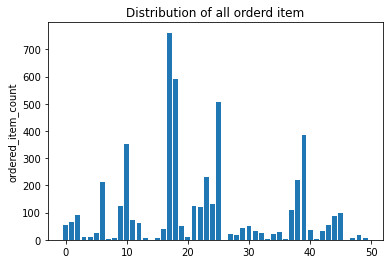

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

item_name_list = item_quantity.index.tolist()
x_pos = np.arange(len(item_name_list))
order_cnt = item_quantity.values.tolist()
 
plt.bar(x_pos, order_cnt, align='center')
plt.ylabel('ordered_item_count')
plt.title('Distribution of all orderd item')
 
plt.show()

###Step 3. 데이터 전처리: 나만의 조력자를 정의하자
####apply와 lambda 함수를 이용한 데이터 전처리

In [ ]:
print(chipo.info())
print("------------------------------------------------------------------------------")
chipo['item_price'].head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   object
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(1), object(4)
memory usage: 180.7+ KB
None
------------------------------------------------------------------------------


0     $2.39 
1     $3.39 
2     $3.39 
3     $2.39 
4    $16.98 
Name: item_price, dtype: object

In [ ]:
# column 단위 데이터에 apply 함수로 전처리 적용
chipo['item_price'] = chipo['item_price'].apply(lambda x: float(x[1:]))

In [ ]:
print(chipo['item_price'])
print("------------------------------------------------------------------------------")
chipo['item_price'].head()

0        2.39
1        3.39
2        3.39
3        2.39
4       16.98
        ...  
4617    11.75
4618    11.75
4619    11.25
4620     8.75
4621     8.75
Name: item_price, Length: 4622, dtype: float64
------------------------------------------------------------------------------


0     2.39
1     3.39
2     3.39
3     2.39
4    16.98
Name: item_price, dtype: float64

In [ ]:
chipo.describe()

quantity   item_price
count  4622.000000  4622.000000
mean      1.075725     7.464336
std       0.410186     4.245557
min       1.000000     1.090000
25%       1.000000     3.390000
50%       1.000000     8.750000
75%       1.000000     9.250000
max      15.000000    44.250000

###Step 4. 탐색적 분석: 스무고개로 분석하는 개념적 탐색

#### 데이터를 이해하기 위한 조금 더 복잡한 질문들로 탐색적 데이터 분석 연습하기
- 주문당 평균 계산금액 출력하기
- 한 주문에 10달러 이상 사용한 주문의 id들 출력하기
- 각 아이템의 가격 구하기
- 가장 비싼 주문에서 item이 몇개 팔렸는지 구하기
- “Veggie Salad Bowl”이 몇 번 주문되었는지 구하기
- “Chicken Bowl”을 2개 이상 주문한 주문 횟수 구하기

####주문당 평균 계산금액 출력하기

In [ ]:
# 주문당 평균 계산금액 출력
chipo.groupby('order_id')['item_price'].sum().mean()

18.811428571428717

In [ ]:
chipo.groupby('order_id')['item_price'].sum().describe()[:10]

count    1834.000000
mean       18.811429
std        11.652512
min        10.080000
25%        12.572500
50%        16.200000
75%        21.960000
max       205.250000
Name: item_price, dtype: float64

####한 주문에 10달러 이상 사용한 주문 번호(id) 출력하기

In [ ]:
# 한 주문에 10달러 이상 사용한 id 출력
chipo_orderid_group = chipo.groupby('order_id').sum()
chipo_orderid_group

quantity  item_price
order_id                      
1                4       11.56
10               2       13.20
100              2       10.08
1000             2       20.50
1001             2       10.08
...            ...         ...
995              3       24.95
996              4       43.00
997              2       22.50
998              2       10.88
999              5       29.25

[1834 rows x 2 columns]

In [ ]:
results = chipo_orderid_group[chipo_orderid_group.item_price >= 10]
results

quantity  item_price
order_id                      
1                4       11.56
10               2       13.20
100              2       10.08
1000             2       20.50
1001             2       10.08
...            ...         ...
995              3       24.95
996              4       43.00
997              2       22.50
998              2       10.88
999              5       29.25

[1834 rows x 2 columns]

In [ ]:
print(results[:10])
print("------------------------------------------------------------------------------")
print(results.index.values)

          quantity  item_price
order_id                      
1                4       11.56
10               2       13.20
100              2       10.08
1000             2       20.50
1001             2       10.08
1002             2       10.68
1003             2       13.00
1004             2       21.96
1005             3       12.15
1006             8       71.40
------------------------------------------------------------------------------
['1' '10' '100' ... '997' '998' '999']


####각 아이템의 가격 구하기

In [ ]:
# 각 아이템의 가격 계산
chipo_one_item = chipo[chipo.quantity == 1]
print(chipo_one_item)

     order_id  ...  item_price
0           1  ...        2.39
1           1  ...        3.39
2           1  ...        3.39
3           1  ...        2.39
5           3  ...       10.98
...       ...  ...         ...
4617     1833  ...       11.75
4618     1833  ...       11.75
4619     1834  ...       11.25
4620     1834  ...        8.75
4621     1834  ...        8.75

[4355 rows x 5 columns]


In [ ]:
price_per_item = chipo_one_item.groupby('item_name').min()
print(price_per_item)

                                      order_id  ...  item_price
item_name                                       ...            
6 Pack Soft Drink                         1076  ...        6.49
Barbacoa Bowl                             1000  ...        8.69
Barbacoa Burrito                          1002  ...        8.69
Barbacoa Crispy Tacos                      110  ...        8.99
Barbacoa Salad Bowl                       1283  ...        9.39
Barbacoa Soft Tacos                       1103  ...        8.99
Bottled Water                             1009  ...        1.09
Bowl                                       279  ...        7.40
Burrito                                    214  ...        7.40
Canned Soda                                100  ...        1.09
Canned Soft Drink                         1003  ...        1.25
Carnitas Bowl                             1007  ...        8.99
Carnitas Burrito                          1003  ...        8.69
Carnitas Crispy Tacos                   

In [ ]:
price_per_item.sort_values(by = "item_price", ascending = False)[:10]
price_per_item

order_id  ...  item_price
item_name                                       ...            
6 Pack Soft Drink                         1076  ...        6.49
Barbacoa Bowl                             1000  ...        8.69
Barbacoa Burrito                          1002  ...        8.69
Barbacoa Crispy Tacos                      110  ...        8.99
Barbacoa Salad Bowl                       1283  ...        9.39
Barbacoa Soft Tacos                       1103  ...        8.99
Bottled Water                             1009  ...        1.09
Bowl                                       279  ...        7.40
Burrito                                    214  ...        7.40
Canned Soda                                100  ...        1.09
Canned Soft Drink                         1003  ...        1.25
Carnitas Bowl                             1007  ...        8.99
Carnitas Burrito                          1003  ...        8.69
Carnitas Crispy Tacos                     1774  ...        8.99
Carnitas Salad                            1500  ...        8.99
Carnitas Salad Bowl                       1035  ...        9.39
Carnitas Soft Tacos                       1011  ...        8.99
Chicken Bowl                                10  ...        8.19
Chicken Burrito                           1005  ...        8.19
Chicken Crispy Tacos                      1010  ...        8.49
Chicken Salad                              109  ...        8.19
Chicken Salad Bowl                        1015  ...        8.75
Chicken Soft Tacos                        1006  ...        8.49
Chips                                     1005  ...        1.99
Chips and Fresh Tomato Salsa                 1  ...        2.29
Chips and Guacamole                         10  ...        3.89
Chips and Mild Fresh Tomato Salsa          279  ...        3.00
Chips and Roasted Chili Corn Salsa         102  ...        2.95
Chips and Roasted Chili-Corn Salsa        1156  ...        2.39
Chips and Tomatillo Green Chili Salsa      102  ...        2.95
Chips and Tomatillo Red Chili Salsa       1020  ...        2.95
Chips and Tomatillo-Green Chili Salsa        1  ...        2.39
Chips and Tomatillo-Red Chili Salsa       1215  ...        2.39
Crispy Tacos                               217  ...        7.40
Izze                                         1  ...        3.39
Nantucket Nectar                             1  ...        3.39
Salad                                      575  ...        7.40
Side of Chips                             1002  ...        1.69
Steak Bowl                                1006  ...        8.69
Steak Burrito                              100  ...        8.69
Steak Crispy Tacos                        1044  ...        8.69
Steak Salad                               1406  ...        8.69
Steak Salad Bowl                          1032  ...        9.39
Steak Soft Tacos                          1054  ...        8.99
Veggie Bowl                               1006  ...        8.49
Veggie Burrito                            1033  ...        8.49
Veggie Crispy Tacos                        668  ...        8.49
Veggie Salad                              1094  ...        8.49
Veggie Salad Bowl                         1066  ...        8.75
Veggie Soft Tacos                         1132  ...        8.49

[50 rows x 4 columns]

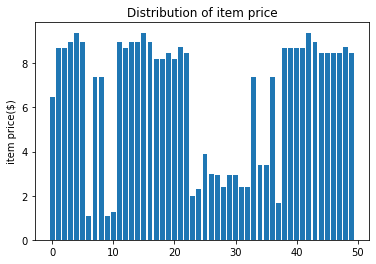

In [ ]:
# 아이템 가격 분포 그래프 출력
item_name_list = price_per_item.index.tolist()
x_pos = np.arange(len(item_name_list))
item_price = price_per_item['item_price'].tolist()
 
plt.bar(x_pos, item_price, align='center')
plt.ylabel('item price($)')
plt.title('Distribution of item price')
 
plt.show()

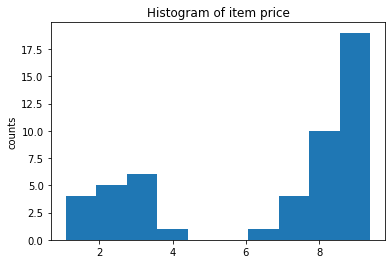

In [ ]:
# 아이템 가격 히스토그램 출력
plt.hist(item_price)
plt.ylabel('counts')
plt.title('Histogram of item price')

plt.show()

####가장 비싼 주문에서 item이 총 몇개 팔렸는지 구하기

In [ ]:
# 가장 비싼 주문에서 item이 총 몇개 팔렸는지 계산
chipo.groupby('order_id').sum().sort_values(by='item_price', ascending=False)[:5]

quantity  item_price
order_id                      
926             23      205.25
1443            35      160.74
1483            14      139.00
691             11      118.25
1786            20      114.30

####“Veggie Salad Bowl”이 몇 번 주문되었는지 구하기

In [ ]:
# “Veggie Salad Bowl”이 몇 번 주문되었는지 계산
chipo_salad = chipo[chipo['item_name'] == "Veggie Salad Bowl"]
print(chipo_salad)
print("------------------------------------------------------------------------------")
chipo_salad = chipo_salad.drop_duplicates(['item_name', 'order_id']) # 한 주문 내에서 중복 집계된 item_name을 제거
print(chipo_salad)
print("------------------------------------------------------------------------------")
print(len(chipo_salad))
chipo_salad.head(5)

     order_id  ...  item_price
186        83  ...       11.25
295       128  ...       11.25
455       195  ...       11.25
496       207  ...       11.25
960       394  ...        8.75
1316      536  ...        8.75
1884      760  ...       11.25
2156      869  ...       11.25
2223      896  ...        8.75
2269      913  ...        8.75
2683     1066  ...        8.75
3223     1289  ...       11.25
3293     1321  ...        8.75
4109     1646  ...       11.25
4201     1677  ...       11.25
4261     1700  ...       11.25
4541     1805  ...        8.75
4573     1818  ...        8.75

[18 rows x 5 columns]
------------------------------------------------------------------------------
     order_id  ...  item_price
186        83  ...       11.25
295       128  ...       11.25
455       195  ...       11.25
496       207  ...       11.25
960       394  ...        8.75
1316      536  ...        8.75
1884      760  ...       11.25
2156      869  ...       11.25
2223      896  ...        8.75

order_id  ...  item_price
186       83  ...       11.25
295      128  ...       11.25
455      195  ...       11.25
496      207  ...       11.25
960      394  ...        8.75

[5 rows x 5 columns]

####“Chicken Bowl”을 2개 이상 주문한 주문 횟수 구하기

In [ ]:
# “Chicken Bowl”을 2개 이상 주문한 주문 횟수 계산
chipo_chicken = chipo[chipo['item_name'] == "Chicken Bowl"]
print(chipo_chicken)
print("------------------------------------------------------------------------------")
chipo_chicken_result = chipo_chicken[chipo_chicken['quantity'] >= 2]
print(chipo_chicken_result)
print("------------------------------------------------------------------------------")
print(chipo_chicken_result.shape[0])

     order_id  ...  item_price
4           2  ...       16.98
5           3  ...       10.98
13          7  ...       11.25
19         10  ...        8.75
26         13  ...        8.49
...       ...  ...         ...
4590     1825  ...       11.25
4591     1825  ...        8.75
4595     1826  ...        8.75
4599     1827  ...        8.75
4604     1828  ...        8.75

[726 rows x 5 columns]
------------------------------------------------------------------------------
     order_id  ...  item_price
4           2  ...       16.98
154        70  ...       17.50
282       124  ...       17.50
409       178  ...       32.94
415       181  ...       17.50
654       271  ...       17.50
976       401  ...       17.50
1017      418  ...       17.50
1106      457  ...       17.50
1429      578  ...       22.50
1514      616  ...       26.25
1588      643  ...       17.50
1832      741  ...       21.96
2075      837  ...       21.96
2106      848  ...       17.50
2339      932  ...       16.9

In [ ]:
# “Chicken Bowl”을 2개 이상 주문한 고객들의 "Chicken Bowl" 메뉴의 총 주문 수량 계산
chipo_chicken = chipo[chipo['item_name'] == "Chicken Bowl"]
print(chipo_chicken)
print("------------------------------------------------------------------------------")
chipo_chicken_ordersum = chipo_chicken.groupby('order_id').sum()['quantity']
print(chipo_chicken_ordersum)
print("------------------------------------------------------------------------------")
chipo_chicken_result = chipo_chicken_ordersum[chipo_chicken_ordersum >= 2]
print(chipo_chicken_result)
print("------------------------------------------------------------------------------")

print(len(chipo_chicken_result))
print("------------------------------------------------------------------------------")
chipo_chicken_result.head(5)

     order_id  ...  item_price
4           2  ...       16.98
5           3  ...       10.98
13          7  ...       11.25
19         10  ...        8.75
26         13  ...        8.49
...       ...  ...         ...
4590     1825  ...       11.25
4591     1825  ...        8.75
4595     1826  ...        8.75
4599     1827  ...        8.75
4604     1828  ...        8.75

[726 rows x 5 columns]
------------------------------------------------------------------------------
order_id
10      1
1000    1
1004    2
1006    1
1008    1
       ..
991     1
992     1
995     1
997     2
998     1
Name: quantity, Length: 615, dtype: int64
------------------------------------------------------------------------------
order_id
1004    2
1023    2
1072    2
1078    2
1091    2
       ..
972     2
973     3
983     2
986     2
997     2
Name: quantity, Length: 114, dtype: int64
------------------------------------------------------------------------------
114
-----------------------------------------

order_id
1004    2
1023    2
1072    2
1078    2
1091    2
Name: quantity, dtype: int64

##전세계 음주 데이터 분석하기
###Step1. 탐색: 데이터의 기초 정보 살펴보기

In [ ]:
file_path = '{}{}'.format(ROOT_PATH, 'data/drinks.csv')
drinks = pd.read_csv(file_path)

In [ ]:
print(drinks.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
 5   continent                     170 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 9.2+ KB
None


In [ ]:
drinks.head(10)

country  beer_servings  ...  total_litres_of_pure_alcohol  continent
0        Afghanistan              0  ...                           0.0         AS
1            Albania             89  ...                           4.9         EU
2            Algeria             25  ...                           0.7         AF
3            Andorra            245  ...                          12.4         EU
4             Angola            217  ...                           5.9         AF
5  Antigua & Barbuda            102  ...                           4.9        NaN
6          Argentina            193  ...                           8.3         SA
7            Armenia             21  ...                           3.8         EU
8          Australia            261  ...                          10.4         OC
9            Austria            279  ...                           9.7         EU

[10 rows x 6 columns]

In [ ]:
drinks.describe()

beer_servings  ...  total_litres_of_pure_alcohol
count     193.000000  ...                    193.000000
mean      106.160622  ...                      4.717098
std       101.143103  ...                      3.773298
min         0.000000  ...                      0.000000
25%        20.000000  ...                      1.300000
50%        76.000000  ...                      4.200000
75%       188.000000  ...                      7.200000
max       376.000000  ...                     14.400000

[8 rows x 4 columns]

###Step2. 인사이트의 발견: 탐색과 시각화
####피처간의 상관관계 탐색

In [ ]:
# 연습
# 'beer_servings', 'wine_servings' 두 피처간의 상관계수 계산
# pearson은 상관계수를 구하는 계산 방법 중 하나를 의미하며, 가장 널리 쓰이는 방법
corr = drinks[['beer_servings', 'wine_servings']].corr(method = 'pearson')
print(corr)

               beer_servings  wine_servings
beer_servings       1.000000       0.527172
wine_servings       0.527172       1.000000


In [ ]:
# 피처간의 상관계수 행렬 계산
cols = ['beer_servings', 'spirit_servings', 'wine_servings', 'total_litres_of_pure_alcohol']
corr = drinks[cols].corr(method = 'pearson')
print(corr)

                              beer_servings  ...  total_litres_of_pure_alcohol
beer_servings                      1.000000  ...                      0.835839
spirit_servings                    0.458819  ...                      0.654968
wine_servings                      0.527172  ...                      0.667598
total_litres_of_pure_alcohol       0.835839  ...                      1.000000

[4 rows x 4 columns]


In [ ]:
import seaborn as sns

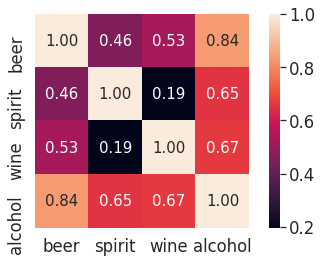

In [ ]:
# corr 행렬 히트맵 시각화
cols_view = ['beer', 'spirit', 'wine', 'alcohol'] # 그래프 출력을 위한 cols 이름 축약
sns.set(font_scale=1.5)
hm = sns.heatmap(corr.values,
            cbar=True,
            annot=True, 
            square=True,
            fmt='.2f',
            annot_kws={'size': 15},
            yticklabels=cols_view,
            xticklabels=cols_view)

plt.tight_layout()
plt.show()

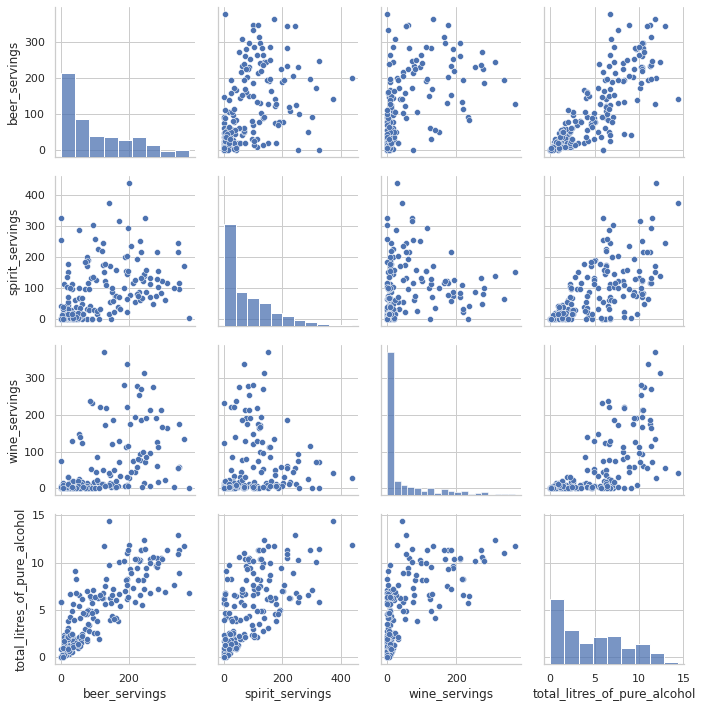

In [ ]:
# 시각화 라이브러리를 이용한 피처간의 scatter plot 출력
sns.set(style='whitegrid', context='notebook')
sns.pairplot(drinks[['beer_servings', 'spirit_servings', 
                     'wine_servings', 'total_litres_of_pure_alcohol']], height=2.5)
plt.show()

###Step3. 탐색적 분석: 스무고개로 분석하는 개념적 탐색
####결측 데이터 전처리
- continent column에 대한 결측 데이터 처리 과정

In [ ]:
print(drinks.isnull().sum())
print("------------------------------------")
print(drinks.dtypes)

country                          0
beer_servings                    0
spirit_servings                  0
wine_servings                    0
total_litres_of_pure_alcohol     0
continent                       23
dtype: int64
------------------------------------
country                          object
beer_servings                     int64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object


In [ ]:
# 결측데이터 처리 : 기타 대륙으로 통합 -> 'OT'
drinks['continent'] = drinks['continent'].fillna('OT')
drinks.head(10)

country  beer_servings  ...  total_litres_of_pure_alcohol  continent
0        Afghanistan              0  ...                           0.0         AS
1            Albania             89  ...                           4.9         EU
2            Algeria             25  ...                           0.7         AF
3            Andorra            245  ...                          12.4         EU
4             Angola            217  ...                           5.9         AF
5  Antigua & Barbuda            102  ...                           4.9         OT
6          Argentina            193  ...                           8.3         SA
7            Armenia             21  ...                           3.8         EU
8          Australia            261  ...                          10.4         OC
9            Austria            279  ...                           9.7         EU

[10 rows x 6 columns]

####파이차트 시각화

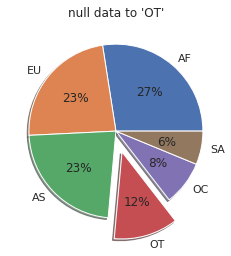

In [ ]:
labels = drinks['continent'].value_counts().index.tolist()
fracs1 = drinks['continent'].value_counts().values.tolist()
explode = (0, 0, 0, 0.25, 0, 0)

plt.pie(fracs1, explode=explode, labels=labels, autopct='%.0f%%', shadow=True)
plt.title('null data to \'OT\'')
plt.show()

####그룹 단위의 데이터 분석 : 대륙별 분석
- apply, agg 함수를 이용한 대륙별 분석

In [ ]:
# 대륙별 spirit_servings의 평균, 최소, 최대, 합계 계산
result = drinks.groupby('continent').spirit_servings.agg(['mean', 'min', 'max', 'sum'])
result.head()

mean  min  max   sum
continent                            
AF          16.339623    0  152   866
AS          60.840909    0  326  2677
EU         132.555556    0  373  5965
OC          58.437500    0  254   935
OT         165.739130   68  438  3812

In [ ]:
# 전체 평균보다 많은 알코올을 섭취하는 대륙 검출
total_mean = drinks.total_litres_of_pure_alcohol.mean()
print(total_mean)
print('-----------------------------------------------------------------------------------')
continent_mean = drinks.groupby('continent')['total_litres_of_pure_alcohol'].mean()
print(continent_mean)
print('-----------------------------------------------------------------------------------')
continent_over_mean = continent_mean[continent_mean >= total_mean]
print(continent_over_mean)

4.717098445595855
-----------------------------------------------------------------------------------
continent
AF    3.007547
AS    2.170455
EU    8.617778
OC    3.381250
OT    5.995652
SA    6.308333
Name: total_litres_of_pure_alcohol, dtype: float64
-----------------------------------------------------------------------------------
continent
EU    8.617778
OT    5.995652
SA    6.308333
Name: total_litres_of_pure_alcohol, dtype: float64


In [ ]:
# 평균 beer_servings이 가장 높은 대륙 검출
beer_continent = drinks.groupby('continent').beer_servings.mean().idxmax()
print(beer_continent)

EU


####분석 결과에 대한 시각화

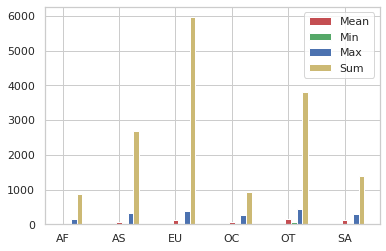

In [ ]:
# 대륙별 spirit_servings의 평균, 최소, 최대, 합계 시각화
n_groups = len(result.index)
means = result['mean'].tolist()
mins = result['min'].tolist()
maxs = result['max'].tolist()
sums = result['sum'].tolist()
 
index = np.arange(n_groups)
bar_width = 0.1
 
rects1 = plt.bar(index, means, bar_width,
                 color='r',
                 label='Mean')
 
rects2 = plt.bar(index + bar_width, mins, bar_width,
                 color='g',
                 label='Min')

rects3 = plt.bar(index + bar_width * 2, maxs, bar_width,
                 color='b',
                 label='Max')
 
rects3 = plt.bar(index + bar_width * 3, sums, bar_width,
                 color='y',
                 label='Sum')

plt.xticks(index, result.index.tolist())
plt.legend()
plt.show()

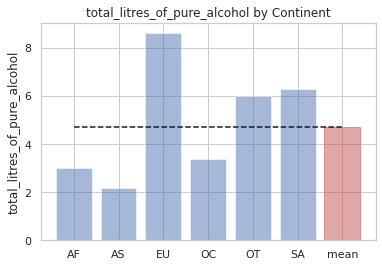

In [ ]:
# 대륙별 total_litres_of_pure_alcohol 시각화
continents = continent_mean.index.tolist()
continents.append('mean')
x_pos = np.arange(len(continents))
alcohol = continent_mean.tolist()
alcohol.append(total_mean)
 
bar_list = plt.bar(x_pos, alcohol, align='center', alpha=0.5)
bar_list[len(continents) - 1].set_color('r')
plt.plot([0., 6], [total_mean, total_mean], "k--")
plt.xticks(x_pos, continents)

plt.ylabel('total_litres_of_pure_alcohol')
plt.title('total_litres_of_pure_alcohol by Continent')

plt.show()

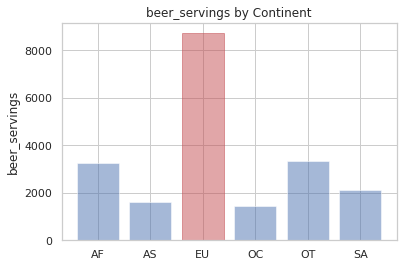

In [ ]:
# 대륙별 beer_servings 시각화
beer_group = drinks.groupby('continent')['beer_servings'].sum()
continents = beer_group.index.tolist()
y_pos = np.arange(len(continents))
alcohol = beer_group.tolist()
 
bar_list = plt.bar(y_pos, alcohol, align='center', alpha=0.5)
bar_list[continents.index("EU")].set_color('r')
plt.xticks(y_pos, continents)
plt.ylabel('beer_servings')
plt.title('beer_servings by Continent')
 
plt.show()

###Step4. 통계적 분석: 분석 대상간의 통계적 차이 검정하기
####아프리카와 유럽간의 맥주 소비량 차이 검정하기

In [ ]:
# 아프리카와 유럽간의 맥주 소비량 차이 검정
africa = drinks.loc[drinks['continent']=='AF']
europe = drinks.loc[drinks['continent']=='EU']

from scipy import stats
tTestResult = stats.ttest_ind(africa['beer_servings'], europe['beer_servings'])
tTestResultDiffVar = stats.ttest_ind(africa['beer_servings'], europe['beer_servings'], equal_var=False)

print("The t-statistic and p-value assuming equal variances is %.3f and %.3f." % tTestResult)
print("The t-statistic and p-value not assuming equal variances is %.3f and %.3f" % tTestResultDiffVar)

The t-statistic and p-value assuming equal variances is -7.268 and 0.000.
The t-statistic and p-value not assuming equal variances is -7.144 and 0.000


####대한민국은 얼마나 술을 독하게 마시는 나라일까?

In [ ]:
# total_servings 피처 생성
drinks['total_servings'] = drinks['beer_servings'] + drinks['wine_servings'] + drinks['spirit_servings']

# 술 소비량 대비 알콜 비율 피처 생성
drinks['alcohol_rate'] = drinks['total_litres_of_pure_alcohol'] / drinks['total_servings']
drinks['alcohol_rate'] = drinks['alcohol_rate'].fillna(0)

# 순위 정보 생성
country_with_rank = drinks[['country', 'alcohol_rate']]
country_with_rank = country_with_rank.sort_values(by=['alcohol_rate'], ascending=0)
country_with_rank.head(5)

country  alcohol_rate
63         Gambia      0.266667
153  Sierra Leone      0.223333
124       Nigeria      0.185714
179        Uganda      0.153704
142        Rwanda      0.151111

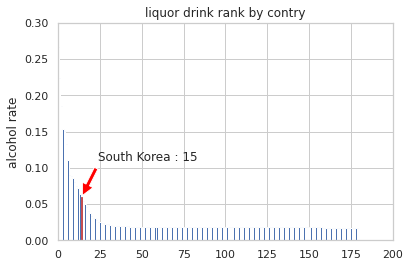

In [ ]:
# 국가별 순위 정보를 그래프로 시각화
country_list = country_with_rank.country.tolist()
x_pos = np.arange(len(country_list))
rank = country_with_rank.alcohol_rate.tolist()
 
bar_list = plt.bar(x_pos, rank)
bar_list[country_list.index("South Korea")].set_color('r')
plt.ylabel('alcohol rate')
plt.title('liquor drink rank by contry')
plt.axis([0, 200, 0, 0.3])

korea_rank = country_list.index("South Korea")
korea_alc_rate = country_with_rank[country_with_rank['country'] == 'South Korea']['alcohol_rate'].values[0]
plt.annotate('South Korea : ' + str(korea_rank + 1), 
             xy=(korea_rank, korea_alc_rate), 
             xytext=(korea_rank + 10, korea_alc_rate + 0.05),
             arrowprops=dict(facecolor='red', shrink=0.05))

plt.show()